In [490]:
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy import stats
from itertools import combinations as combowombo
import matplotlib.pyplot as plt

In [2]:
with open('data/d_quite_big.in') as file:
    data = file.read().split()

data = [int(_) for _ in data]
MAXSLICES = data[0]
TYPES = data[1]
PIZZAS = data[2:]
pizza_indices = {pizza: index for index, pizza in enumerate(PIZZAS)}

In [96]:
def create_sorted_prob_list(size = 1, dist = np.random.uniform, **kwargs):
    prob_list = sorted(dist(size = size, **kwargs))
    total = sum(prob_list)
    prob_list = prob_list/total
    return prob_list

In [193]:
def expon_list(size = 1, scale = 1):
    prob_list = sorted(np.array([(1/scale)*expon.pdf(x/scale) for x in range(size)]))
    normed_list = prob_list/sum(prob_list)
    return normed_list

In [278]:
def all_slices(pizza_list):
    possible_slices = sorted([sum(comb) for k in range(1,len(pizza_list)+1) for comb in combowombo(pizza_list,k)])
    return possible_slices

In [199]:
def compute_slices(max = MAXSLICES, pizza_list = PIZZAS):
    final_list = []
    while (max >= 0):
      admissible_pizzas = [pizza for pizza in pizza_list if pizza <= max]
      if admissible_pizzas:
        num_pizzas = len(admissible_pizzas)
        prob_list = create_prob_list(size=num_pizzas, dist=np.random.exponential, scale = 0.0001)
        index = np.random.choice(num_pizzas,p=prob_list)
        rand_pizza = admissible_pizzas.pop(index)
        pizza_list = admissible_pizzas
        max = max - rand_pizza
        final_list.append(rand_pizza)
      else:
        break
    return final_list

In [515]:
MAX = 385749466
best_output = []
best_total = 0

if MAX < 5E6:
    reps = 100000
elif MAX < 50E6:
    reps = 10000
elif MAX < 500E6:
    reps = 1000
else:
    reps = 100

#I collected some data on how long a particular best solution survives for and modeled it with a Weibull distribution.
#I computed the relative liklihood that the best solution would survive 42 more rounds given it survived until time T.
#If a solution survives 470 rounds, there is an 80% chance that it will survive 42 more rounds. This was good enough for me to call it
#a winner early. This avoids situations where it is actually impossible to make the MAXSLICES.
#record_prob = []
counter = 0

for i in range(reps):
    if best_total == MAX:
        break
    if counter >= 470:
        break
    output = compute_slices(max = MAX)
    total = sum(output)
    if total > best_total:
        best_total = total
        best_output = output
        #if counter:
        #    record_prob.append(counter)
        counter = 0
    else:
        counter += 1
        
print(f'Total = {best_total} \ndiff = {MAX - best_total}')

Total = 385749466 
diff = 0


In [239]:
Mama_Mia_Its_A_Pizza = sorted([pizza_indices[p] for p in best_output])

In [436]:
collected_prob = []

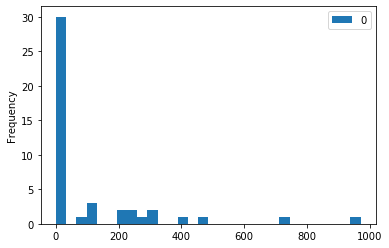

In [471]:
collected_prob.extend(record_prob)
td = pd.DataFrame(collected_prob)
td.plot.hist(bins=30)

In [465]:
len(collected_prob)

37

In [513]:
c = stats.weibull_min.fit(collected_prob)
c

(0.37092422645806417, 0.9999999999999998, 123.10468657765978)

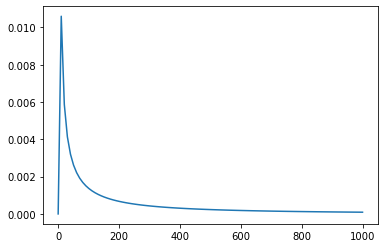

In [514]:
x = np.linspace(0,1000, 100)
W = stats.weibull_min(*c)
plt.plot(x,W.pdf(x))
